In [1]:
import pandas as pd
import numpy as np

In [2]:
from preprocessingHelper import PreprocessingHelper

In [3]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
df.columns=[col.upper() for col in df.columns]

In [5]:
pp=PreprocessingHelper(dataframe=df)

## Data Analysis

In [6]:
pp.checkDf()

##################### Shape #####################
(7043, 21)
##################### Describe #####################
                 count       mean        std    min   25%    50%    75%  \
SENIORCITIZEN   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
TENURE          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MONTHLYCHARGES  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SENIORCITIZEN     1.00  
TENURE           72.00  
MONTHLYCHARGES  118.75  
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUSTOMERID        7043 non-null   object 
 1   GENDER            7043 non-null   object 
 2   SENIORCITIZEN     7043 non-null   int64  
 3   PARTNER           7043 non-null   object 
 4   DEPENDENTS        7043 non-null   object 


In [7]:
df.loc[df["TOTALCHARGES"]==" ","TOTALCHARGES"]=np.NaN

In [8]:
df.loc[(df["TENURE"]==0)&(df["MONTHLYCHARGES"]!=0),"TENURE"]=np.NaN

In [9]:
pp.missingValuesTable()

              Count     Ratio
TENURE           11  0.001562
TOTALCHARGES     11  0.001562


In [10]:
df["TOTALCHARGES"]=df["TOTALCHARGES"].apply(pd.to_numeric)

In [11]:
cat_cols,cat_but_car,num_cols=pp.grabColNames()

Observations = 7043

Variables = 21

catorical columns = 17

catorical but cardinal columns = 1

numerical columns = 3

numerical but categorical columns = 1



In [12]:
for col in cat_cols:
    pp.catSummary(col_name=col)

        GENDER     Ratio
Male      3555  50.47565
Female    3488  49.52435
##########################################
     PARTNER     Ratio
No      3641  51.69672
Yes     3402  48.30328
##########################################
     DEPENDENTS      Ratio
No         4933  70.041176
Yes        2110  29.958824
##########################################
     PHONESERVICE      Ratio
Yes          6361  90.316626
No            682   9.683374
##########################################
                  MULTIPLELINES      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################
             INTERNETSERVICE      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903
##########################################
                     ONLINESECURITY      Ratio
No                             3498  49.666335
Yes 

         count       mean       std  min   5%  10%  20%   30%   40%   50%  \
TENURE  7032.0  32.421786  24.54526  1.0  1.0  2.0  6.0  12.0  20.0  29.0   

         60%   70%   80%   90%   95%   99%   max  
TENURE  40.0  50.0  60.8  69.0  72.0  72.0  72.0  



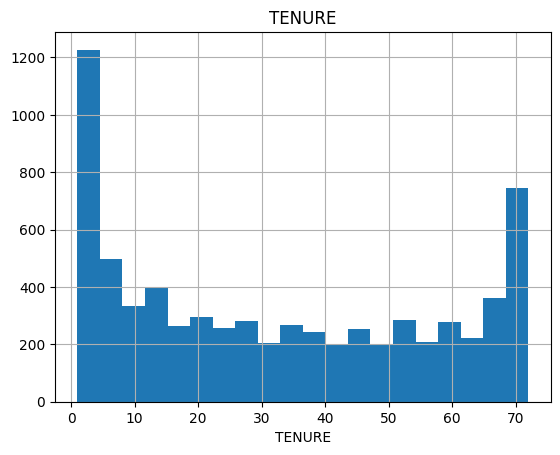

                 count       mean        std    min     5%    10%    20%  \
MONTHLYCHARGES  7043.0  64.761692  30.090047  18.25  19.65  20.05  25.05   

                  30%    40%    50%   60%   70%    80%    90%    95%      99%  \
MONTHLYCHARGES  45.85  58.83  70.35  79.1  85.5  94.25  102.6  107.4  114.729   

                   max  
MONTHLYCHARGES  118.75  



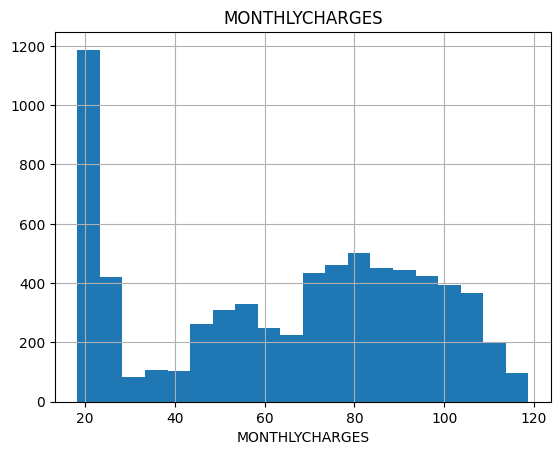

               count         mean          std   min      5%   10%     20%  \
TOTALCHARGES  7032.0  2283.300441  2266.771362  18.8  49.605  84.6  267.07   

                  30%     40%       50%      60%      70%      80%      90%  \
TOTALCHARGES  551.995  944.17  1397.475  2048.95  3141.13  4475.41  5976.64   

                  95%       99%     max  
TOTALCHARGES  6923.59  8039.883  8684.8  



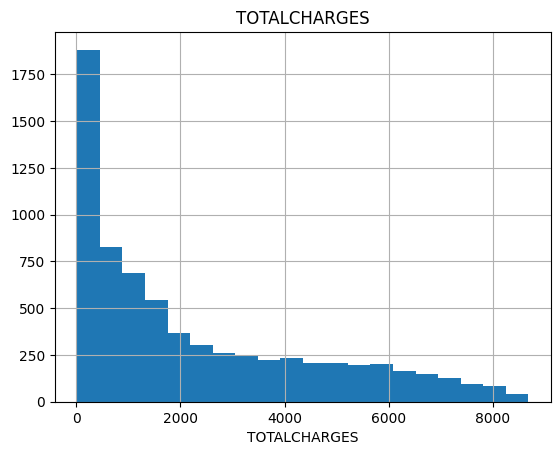

In [13]:
for col in num_cols:
    pp.numSummary(numerical_col=col,plot=True)

In [14]:
df["CHURN"]=df["CHURN"].apply(lambda x: 1 if x=="Yes" else 0)

In [15]:
for col in cat_cols:
    pp.targetSummaryWithCat(categorical_col=col,target="CHURN")

        CHURN_Mean
GENDER            
Female    0.269209
Male      0.261603


##########################################

         CHURN_Mean
PARTNER            
No         0.329580
Yes        0.196649


##########################################

            CHURN_Mean
DEPENDENTS            
No            0.312791
Yes           0.154502


##########################################

              CHURN_Mean
PHONESERVICE            
No              0.249267
Yes             0.267096


##########################################

                  CHURN_Mean
MULTIPLELINES               
No                  0.250442
No phone service    0.249267
Yes                 0.286099


##########################################

                 CHURN_Mean
INTERNETSERVICE            
DSL                0.189591
Fiber optic        0.418928
No                 0.074050


##########################################

                     CHURN_Mean
ONLINESECURITY                 
No                     0.41

In [16]:
for col in num_cols:
    print(f"{col} {pp.checkOutlier(column_name=col,q1=0.05,q3=0.95)}")

TENURE False
MONTHLYCHARGES False
TOTALCHARGES False


## Feature Engineering

### Missing Values

In [17]:
missing_rows=df[df.isnull().any(axis=1)]

In [18]:
missing_rows

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
488,4472-LVYGI,Female,0,Yes,Yes,NaN,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,NaN,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,NaN,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,NaN,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,NaN,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,NaN,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [19]:
pp.missingValuesFiller()

              Count     Ratio
TENURE           11  0.001562
TOTALCHARGES     11  0.001562


In [20]:
pp.missingValuesTable()

Empty DataFrame
Columns: [Count, Ratio]
Index: []


In [21]:
df.iloc[missing_rows.index][["TENURE","TOTALCHARGES"]]

,TENURE,TOTALCHARGES
488,38.0,1682.050
753,30.5,611.550
936,27.0,2204.350
1082,52.0,1345.850
1340,27.0,1537.925
3331,59.0,1188.250
3826,70.0,1715.150
4380,45.0,884.725
5218,20.0,415.900
6670,13.0,931.550


### New Features

In [22]:
df.columns

Index(['CUSTOMERID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS',
       'TENURE', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE',
       'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT',
       'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING',
       'PAYMENTMETHOD', 'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN'],
      dtype='object')

In [23]:
service_cols=["PHONESERVICE","MULTIPLELINES","INTERNETSERVICE","ONLINESECURITY","ONLINEBACKUP","DEVICEPROTECTION","TECHSUPPORT","STREAMINGTV","STREAMINGMOVIES"]

In [24]:
df["NEW_PREMIUM_USER"]=1
for col in service_cols:
    if df[col].dtype!="O":
        df["NEW_PREMIUM_USER"]*=df[col]
    else:
        df["NEW_PREMIUM_USER"]*=df[col].apply(lambda x:0 if "no" in x or "No" in x else 1)

In [25]:
df["NEW_PREMIUM_USER"].value_counts()

0    6835
1     208
Name: NEW_PREMIUM_USER, dtype: int64

In [26]:
df["NEW_STREAMING_USER"]=1
for col in ["STREAMINGTV","STREAMINGMOVIES"]:
    if df[col].dtype!="O":
        df["NEW_STREAMING_USER"]*=df[col]
    else:
        df["NEW_STREAMING_USER"]*=df[col].apply(lambda x:0 if "no" in x or "No" in x else 1)
df["NEW_STREAMING_USER"].value_counts()

0    5103
1    1940
Name: NEW_STREAMING_USER, dtype: int64

In [27]:
df["NEW_PHONE_USER"]=1
for col in ["PHONESERVICE","MULTIPLELINES"]:
    if df[col].dtype!="O":
        df["NEW_PHONE_USER"]*=df[col]
    else:
        df["NEW_PHONE_USER"]*=df[col].apply(lambda x:0 if "no" in x or "No" in x else 1)
df["NEW_PHONE_USER"].value_counts()

0    4072
1    2971
Name: NEW_PHONE_USER, dtype: int64

In [28]:
df["NEW_INTERNET_USER_WITH_DEPENDENTS"]=1
for col in ["INTERNETSERVICE","DEPENDENTS"]:
    if df[col].dtype!="O":
        df["NEW_INTERNET_USER_WITH_DEPENDENTS"]*=df[col]
    else:
        df["NEW_INTERNET_USER_WITH_DEPENDENTS"]*=df[col].apply(lambda x:0 if "no" in x or "No" in x else 1)
df["NEW_INTERNET_USER_WITH_DEPENDENTS"].value_counts()

0    5576
1    1467
Name: NEW_INTERNET_USER_WITH_DEPENDENTS, dtype: int64

In [29]:
df["NEW_DISCOUNT"]=df.apply(lambda x: True if ((x["TENURE"]*x["MONTHLYCHARGES"]) - x["TOTALCHARGES"]) < 0 else False, axis=1)
df["NEW_DISCOUNT"].value_counts()

False    3833
True     3210
Name: NEW_DISCOUNT, dtype: int64

In [30]:
df["NEW_DISCOUNT_PAPERLESSBILLING"]=1
for col in ["NEW_DISCOUNT","PAPERLESSBILLING"]:
    if df[col].dtype!="O":
        df["NEW_DISCOUNT_PAPERLESSBILLING"]*=df[col]
    else:
        df["NEW_DISCOUNT_PAPERLESSBILLING"]*=df[col].apply(lambda x:0 if "no" in x or "No" in x else 1)
df["NEW_DISCOUNT_PAPERLESSBILLING"].value_counts()

0    5151
1    1892
Name: NEW_DISCOUNT_PAPERLESSBILLING, dtype: int64

In [31]:
df["NEW_AUTOPAYMENT"] = df["PAYMENTMETHOD"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)
df["NEW_AUTOPAYMENT"].value_counts()

0    3977
1    3066
Name: NEW_AUTOPAYMENT, dtype: int64

In [32]:
labels=["0_1_Year","1_2_Year","2_3_Year","3_4_Year","4_5_Year","5_6_Year"]
bins=[-1,12,24,36,48,60,72]
df["NEW_TENURE_YEAR"]=pd.cut(df["TENURE"],labels=labels,bins=bins)
df["NEW_TENURE_YEAR"].value_counts()

0_1_Year    2175
5_6_Year    1408
1_2_Year    1026
2_3_Year     835
4_5_Year     834
3_4_Year     765
Name: NEW_TENURE_YEAR, dtype: int64

In [33]:
df["NEW_TOTAL_SERVICE"]=0
for col in ["ONLINESECURITY","ONLINEBACKUP","DEVICEPROTECTION","TECHSUPPORT","STREAMINGTV","STREAMINGMOVIES"]:
    if df[col].dtype!="O":
        df["NEW_TOTAL_SERVICE"]+=df[col]
    else:
        df["NEW_TOTAL_SERVICE"]+=df[col].apply(lambda x:0 if "no" in x or "No" in x else 1)
df["NEW_TOTAL_SERVICE"].value_counts()

0    2219
3    1118
2    1033
1     966
4     852
5     571
6     284
Name: NEW_TOTAL_SERVICE, dtype: int64

### Encoding

In [34]:
cat_cols,cat_but_car,num_cols=pp.grabColNames()

Observations = 7043

Variables = 30

catorical columns = 26

catorical but cardinal columns = 1

numerical columns = 3

numerical but categorical columns = 11



In [35]:
pp.rareAnalyser(cat_cols=cat_cols,target="CHURN")

GENDER : 2
        Count     Ratio  CHURN_mean
Female   3488  0.495244    0.269209
Male     3555  0.504756    0.261603


PARTNER : 2
     Count     Ratio  CHURN_mean
No    3641  0.516967    0.329580
Yes   3402  0.483033    0.196649


DEPENDENTS : 2
     Count     Ratio  CHURN_mean
No    4933  0.700412    0.312791
Yes   2110  0.299588    0.154502


PHONESERVICE : 2
     Count     Ratio  CHURN_mean
No     682  0.096834    0.249267
Yes   6361  0.903166    0.267096


MULTIPLELINES : 3
                  Count     Ratio  CHURN_mean
No                 3390  0.481329    0.250442
No phone service    682  0.096834    0.249267
Yes                2971  0.421837    0.286099


INTERNETSERVICE : 3
             Count     Ratio  CHURN_mean
DSL           2421  0.343746    0.189591
Fiber optic   3096  0.439585    0.418928
No            1526  0.216669    0.074050


ONLINESECURITY : 3
                     Count     Ratio  CHURN_mean
No                    3498  0.496663    0.417667
No internet service   152

In [36]:
cat_cols.remove("CHURN")
df=pp.oneHotEncoder(cat_cols=cat_cols)

In [37]:
df.head()

,CUSTOMERID,TENURE,MONTHLYCHARGES,TOTALCHARGES,CHURN,GENDER_Male,PARTNER_Yes,DEPENDENTS_Yes,PHONESERVICE_Yes,MULTIPLELINES_No phone service,...,NEW_TENURE_YEAR_2_3_Year,NEW_TENURE_YEAR_3_4_Year,NEW_TENURE_YEAR_4_5_Year,NEW_TENURE_YEAR_5_6_Year,NEW_TOTAL_SERVICE_1,NEW_TOTAL_SERVICE_2,NEW_TOTAL_SERVICE_3,NEW_TOTAL_SERVICE_4,NEW_TOTAL_SERVICE_5,NEW_TOTAL_SERVICE_6
0,7590-VHVEG,1.0,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,34.0,56.95,1889.50,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,3668-QPYBK,2.0,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,7795-CFOCW,45.0,42.30,1840.75,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,9237-HQITU,2.0,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
cat_cols,cat_but_car,num_cols=pp.grabColNames()

Observations = 7043

Variables = 50

catorical columns = 46

catorical but cardinal columns = 1

numerical columns = 3

numerical but categorical columns = 46



In [39]:
df.columns=[col.replace(" ","_").upper() for col in df.columns]

In [40]:
df.columns=[col.strip() for col in df.columns]

# Training

In [41]:
y=df[["CHURN"]]
X=df.drop(["CHURN","CUSTOMERID"],axis=1)

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import mean_squared_error

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [45]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [46]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ("XGB", XGBClassifier(objective='reg:squarederror')),
          ("LightGBM", LGBMClassifier(force_col_wise=True,verbose=-1))
        #   ("CatBoost", CatBoostClassifier(verbose=False))
          ]


In [47]:
for name, model in models:

    cv_results = cross_validate(model, X, y.values.ravel(), cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}\n")

########## LR ##########
Accuracy: 0.8038
Auc: 0.8434
Recall: 0.5292
Precision: 0.6636
F1: 0.5887

########## KNN ##########
Accuracy: 0.7606
Auc: 0.7447
Recall: 0.4435
Precision: 0.5618
F1: 0.4956

########## CART ##########
Accuracy: 0.7243
Auc: 0.6512
Recall: 0.4933
Precision: 0.4814
F1: 0.4871

########## RF ##########
Accuracy: 0.7866
Auc: 0.8213
Recall: 0.4671
Precision: 0.6335
F1: 0.5376

########## XGB ##########
Accuracy: 0.7759
Auc: 0.7983
Recall: 0.4992
Precision: 0.5929
F1: 0.5419

########## LightGBM ##########
Accuracy: 0.7933
Auc: 0.8344
Recall: 0.5233
Precision: 0.6348
F1: 0.5734



## Optimization

In [48]:
model=LogisticRegression()

In [49]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
lr_params = {
    "max_iter": [50,100],
    "l1_ratio":[None,0,1],
    "solver":["lbfgs","sag","saga","newton-cg"]
    }

In [51]:
lgbm_gs_best = GridSearchCV(model,
                            lr_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
lgbm_gs_best.best_params_

{'l1_ratio': None, 'max_iter': 50, 'solver': 'newton-cg'}

## Results

In [53]:
final_model = model.set_params(**lgbm_gs_best.best_params_).fit(X, y.values.ravel())

cv_results = cross_validate(final_model, X, y.values.ravel(), cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}\n")


Accuracy: 0.8035
Auc: 0.8463
Recall: 0.5302
Precision: 0.6622
F1: 0.5888



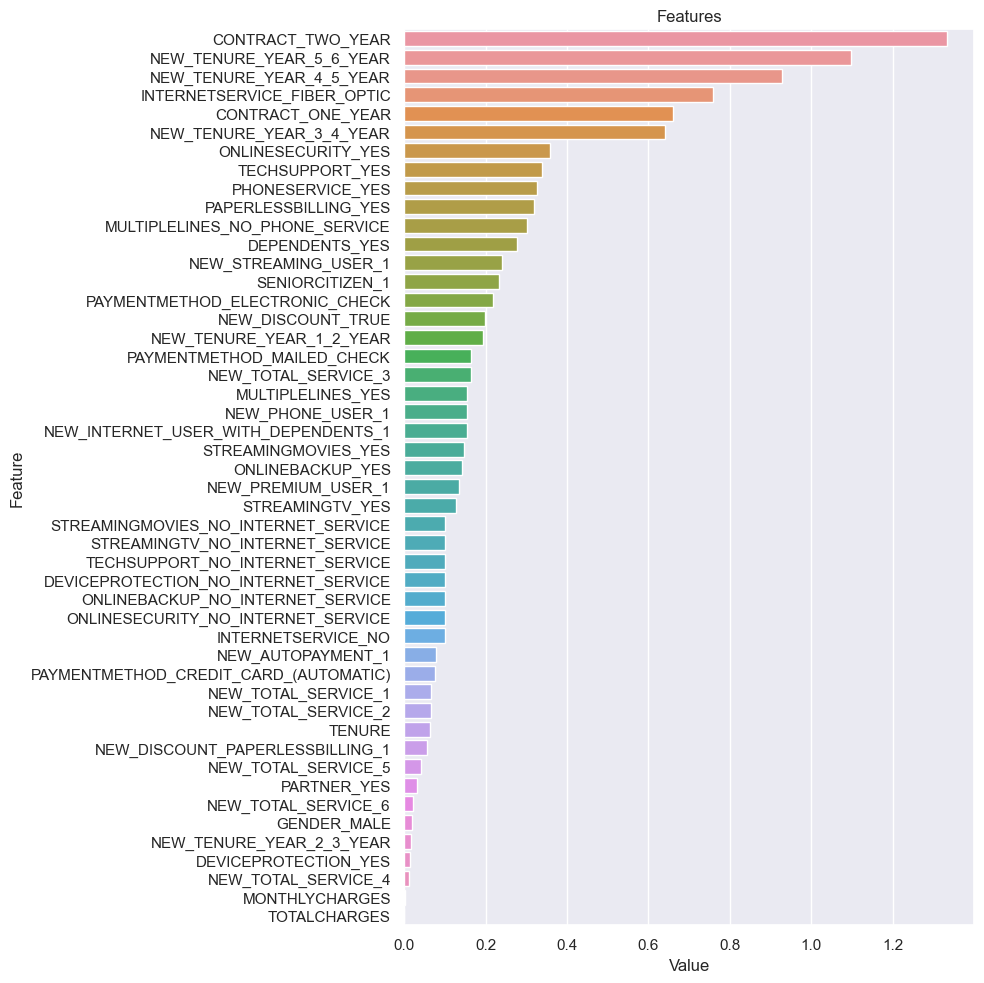

In [54]:
pp.plotImportance(model=final_model,features=X)

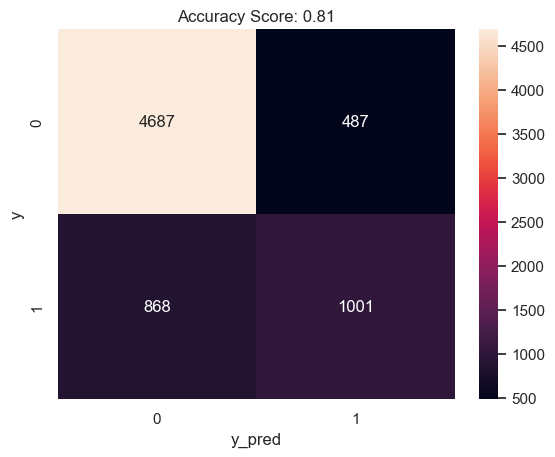

In [56]:
pp.plotConfusionMatrix(y=y,y_pred=final_model.predict(X))